In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/Electric_Production.csv",index_col="DATE", parse_dates=True)

In [ ]:
df

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [ ]:
df = df.rename(columns={"IPG2211A2N":"EP"})

In [ ]:
df.columns

Index(['EP'], dtype='object')

Text(0.5, 1.0, 'Electric Production')

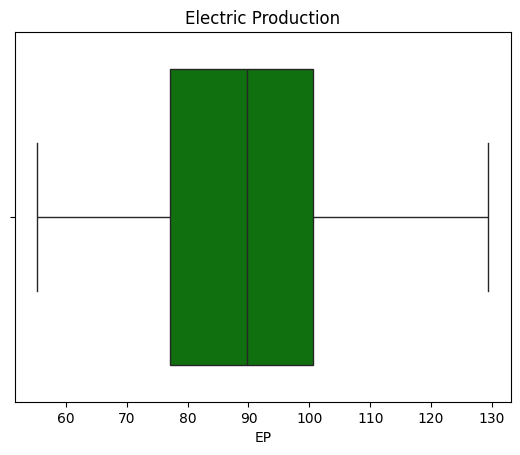

In [ ]:
sns.boxplot(df["EP"],orient="h",color="g")
plt.title("Electric Production")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EP      397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


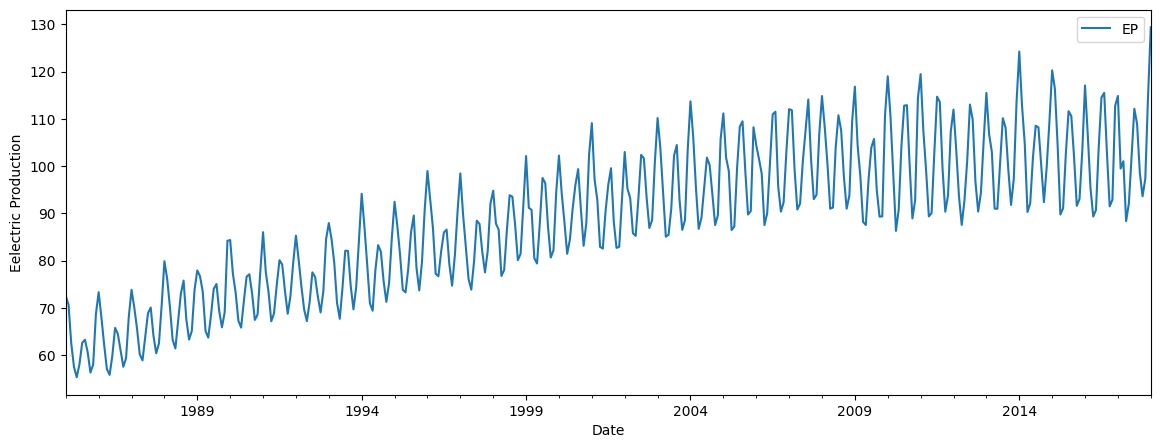

In [ ]:
df.plot(figsize=(14,5))
plt.xlabel("Date")
plt.ylabel("Eelectric Production")
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df.index.freq = "MS"

In [ ]:
result = seasonal_decompose(df["EP"])

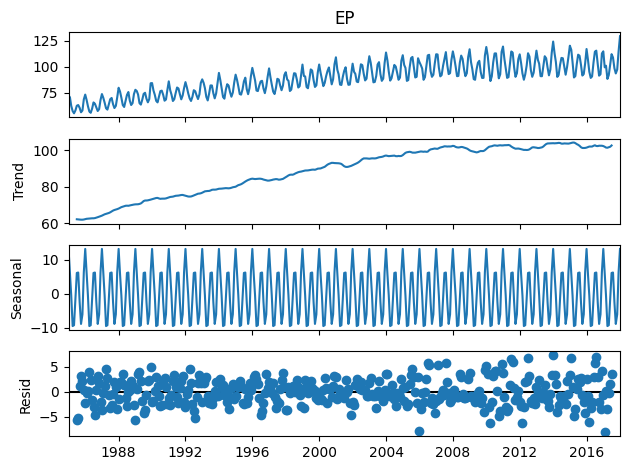

In [ ]:
result.plot();

In [ ]:
len(df)

397

In [ ]:
train=df.iloc[:325]
test= df.iloc[325:]

In [ ]:
len(train)

325

In [ ]:
len(test)

72

In [ ]:
train.iloc[0], train.iloc[-1]

(EP    72.5052
 Name: 1985-01-01 00:00:00, dtype: float64,
 EP    111.9646
 Name: 2012-01-01 00:00:00, dtype: float64)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler= MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:5]

array([[0.26787164],
       [0.23930506],
       [0.11118556],
       [0.03360141],
       [0.        ]])

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 12

In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
len(generator)

313

In [ ]:
X, y = generator[0]
X.ravel(), y

(array([0.26787164, 0.23930506, 0.11118556, 0.03360141, 0.        ,
        0.04324723, 0.11383466, 0.12362539, 0.0821141 , 0.01558758,
        0.04184632, 0.20880153]),
 array([[0.28034575]]))

In [ ]:
scaled_train[:15]

array([[0.26787164],
       [0.23930506],
       [0.11118556],
       [0.03360141],
       [0.        ],
       [0.04324723],
       [0.11383466],
       [0.12362539],
       [0.0821141 ],
       [0.01558758],
       [0.04184632],
       [0.20880153],
       [0.28034575],
       [0.19746342],
       [0.1076311 ]])

In [ ]:
X.shape

(1, 12, 1)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(1000, activation="relu", input_shape=(12,1)))
model.add(Dense(1))

In [ ]:
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(generator, epochs= 40)

Epoch 1/40
313/313 [==============================] - 9s 18ms/step - loss: 0.0229
Epoch 2/40
313/313 [==============================] - 5s 17ms/step - loss: 0.0103
Epoch 3/40
313/313 [==============================] - 7s 21ms/step - loss: 0.0076
Epoch 4/40
313/313 [==============================] - 6s 18ms/step - loss: 0.0043
Epoch 5/40
313/313 [==============================] - 5s 17ms/step - loss: 0.0045
Epoch 6/40
313/313 [==============================] - 6s 18ms/step - loss: 0.0039
Epoch 7/40
313/313 [==============================] - 6s 18ms/step - loss: 0.0047
Epoch 8/40
313/313 [==============================] - 6s 18ms/step - loss: 0.0034
Epoch 9/40
313/313 [==============================] - 6s 20ms/step - loss: 0.0041
Epoch 10/40
313/313 [==============================] - 7s 21ms/step - loss: 0.0035
Epoch 11/40
313/313 [==============================] - 6s 18ms/step - loss: 0.0034
Epoch 12/40
313/313 [==============================] - 7s 22ms/step - loss: 0.0031
Epoch 13/40
3

In [ ]:
loss= model.history.history["loss"]

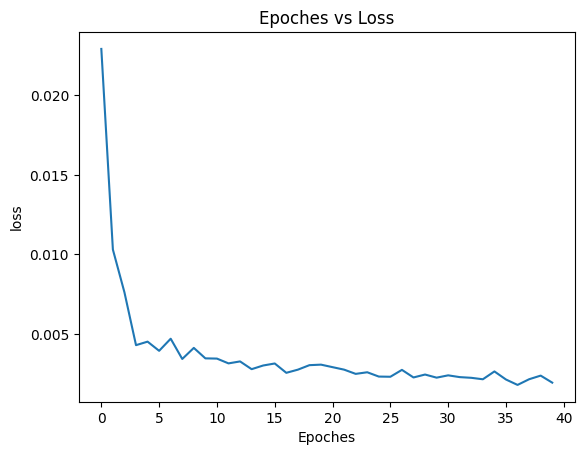

In [ ]:
plt.plot(loss)
plt.xlabel("Epoches")
plt.ylabel("loss")
plt.title("Epoches vs Loss")
plt.show()

In [ ]:
last_train_batch= scaled_train[-12:]

In [ ]:
last_train_batch

array([[0.81124899],
       [0.68233943],
       [0.53049184],
       [0.54157908],
       [0.74027043],
       [0.92549503],
       [0.90818243],
       [0.68808017],
       [0.54604825],
       [0.59985446],
       [0.81056178],
       [0.8827636 ]])

In [ ]:
last_train_batch= last_train_batch.reshape((1,12,1))

In [ ]:
last_train_batch

array([[[0.81124899],
        [0.68233943],
        [0.53049184],
        [0.54157908],
        [0.74027043],
        [0.92549503],
        [0.90818243],
        [0.68808017],
        [0.54604825],
        [0.59985446],
        [0.81056178],
        [0.8827636 ]]])

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 162ms/step


array([[0.7842545]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.74880206])

In [ ]:
test_pred = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_pred.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
test_pred

[array([0.7842545], dtype=float32),
 array([0.65416926], dtype=float32),
 array([0.5568481], dtype=float32),
 array([0.60062236], dtype=float32),
 array([0.7679997], dtype=float32),
 array([0.87347126], dtype=float32),
 array([0.8365018], dtype=float32),
 array([0.6861046], dtype=float32),
 array([0.57564086], dtype=float32),
 array([0.6296926], dtype=float32),
 array([0.81932026], dtype=float32),
 array([0.87890416], dtype=float32),
 array([0.7671055], dtype=float32),
 array([0.6383304], dtype=float32),
 array([0.5735508], dtype=float32),
 array([0.6539762], dtype=float32),
 array([0.7965392], dtype=float32),
 array([0.83903986], dtype=float32),
 array([0.77264345], dtype=float32),
 array([0.67264974], dtype=float32),
 array([0.6107263], dtype=float32),
 array([0.6811253], dtype=float32),
 array([0.80892956], dtype=float32),
 array([0.84464204], dtype=float32),
 array([0.74745125], dtype=float32),
 array([0.63840604], dtype=float32),
 array([0.599119], dtype=float32),
 array([0.703669

In [ ]:
test.head()

,IPG2211A2N
DATE,
2012-02-01,103.3679
2012-03-01,93.5772
2012-04-01,87.5566
2012-05-01,92.7603
2012-06-01,101.1400


In [ ]:
true_pred = scaler.inverse_transform(test_pred)

In [ ]:
test["predicted production"]= true_pred

In [ ]:
test.head()

,EP,predicted production
DATE,,
2012-02-01,103.3679,105.642985
2012-03-01,93.5772,97.295039
2012-04-01,87.5566,91.049658
2012-05-01,92.7603,93.858778
2012-06-01,101.1400,104.599869


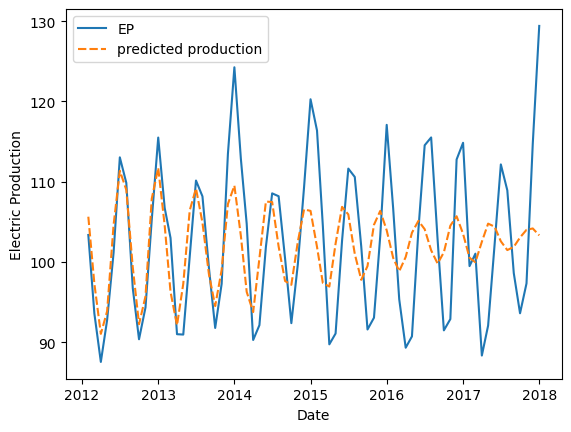

In [ ]:
sns.lineplot(test)
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rsme= np.sqrt(mean_squared_error(test["EP"], test["predicted production"]))

In [ ]:
rsme

7.94053688804088